In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/identity_ood_metrics_deg_BXCP3.csv",
                              index_col=0)

In [3]:
mean_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/mean_train_metrics_deg_BXCP3.csv",
                              index_col=0)

In [4]:
cf_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/cellflow_ood_metrics_deg_BXCP3.csv",
                              index_col=0)

In [5]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [6]:
n_splits = 4
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

In [7]:
gene_list.head()

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Perturbation effect
perturbation,,,,,,,
BXPC3_IFNG_PIK3CA,-7851.426270,0.103228,0.029326,0.026727,0.052950,0.068434,0
BXPC3_IFNG_FBXO6,-6015.102051,0.128041,0.024612,0.022149,0.043871,0.096566,0
BXPC3_TNFA_FOS,-42.556961,0.093885,0.048452,0.045372,0.090114,0.048906,0
BXPC3_IFNG_ZNFX1,-28.049633,0.632871,0.387764,0.367705,0.731307,0.159487,0
BXPC3_IFNG_ZNF267,-15.142530,0.195496,0.063186,0.058625,0.116236,0.102434,0


In [8]:
cf_deg = cf_deg.T
identity_deg = identity_deg.T
mean_deg = mean_deg.T

In [9]:
cf_deg["model"] = "cellflow"
identity_deg["model"] = "id"
mean_deg["model"] = "mean"

In [10]:
merged = pd.concat([cf_deg, identity_deg, mean_deg], axis=0)
merged["ood_cond"] = merged.index

In [11]:
def get_pert_effect(x):
    return gene_list.loc[x["ood_cond"]]["Perturbation effect"]

In [12]:
merged["perturbation_effect"] = merged.apply(get_pert_effect, axis=1)

In [13]:
merged.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/figures/satija/benchmark/new_cell_line_hold_out/metrics_deg.csv")

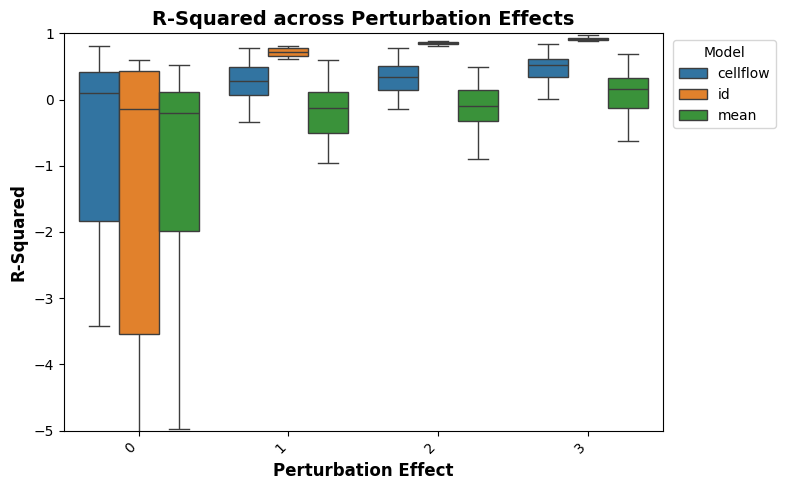

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create the boxplot with improved aesthetics
sns.boxplot(
    data=merged,
    x="perturbation_effect",
    hue="model",
    y="r_squared",
    showfliers=False,  # Hide outliers for cleaner visualization
    #hue_order=["Identity", "Mean", "CellFlow"],  # Ensuring order consistency
    #palette="Set2"  # Use a visually distinct color palette
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set y-axis limits
plt.ylim(-5, 1)

# Add axis labels and title
plt.xlabel("Perturbation Effect", fontsize=12, fontweight="bold")
plt.ylabel("R-Squared", fontsize=12, fontweight="bold")
plt.title("R-Squared across Perturbation Effects", fontsize=14, fontweight="bold")

# Adjust legend position
plt.legend(title="Model", loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
merged["cyto"] = merged.apply(lambda x: x["ood_cond"].split("_")[1], axis=1)

/tmp/ipykernel_2374140/3180562446.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2374140/3180562446.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2374140/3180562446.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2374140/3180562446.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_2374140/3180562446.py:28: UserWarning

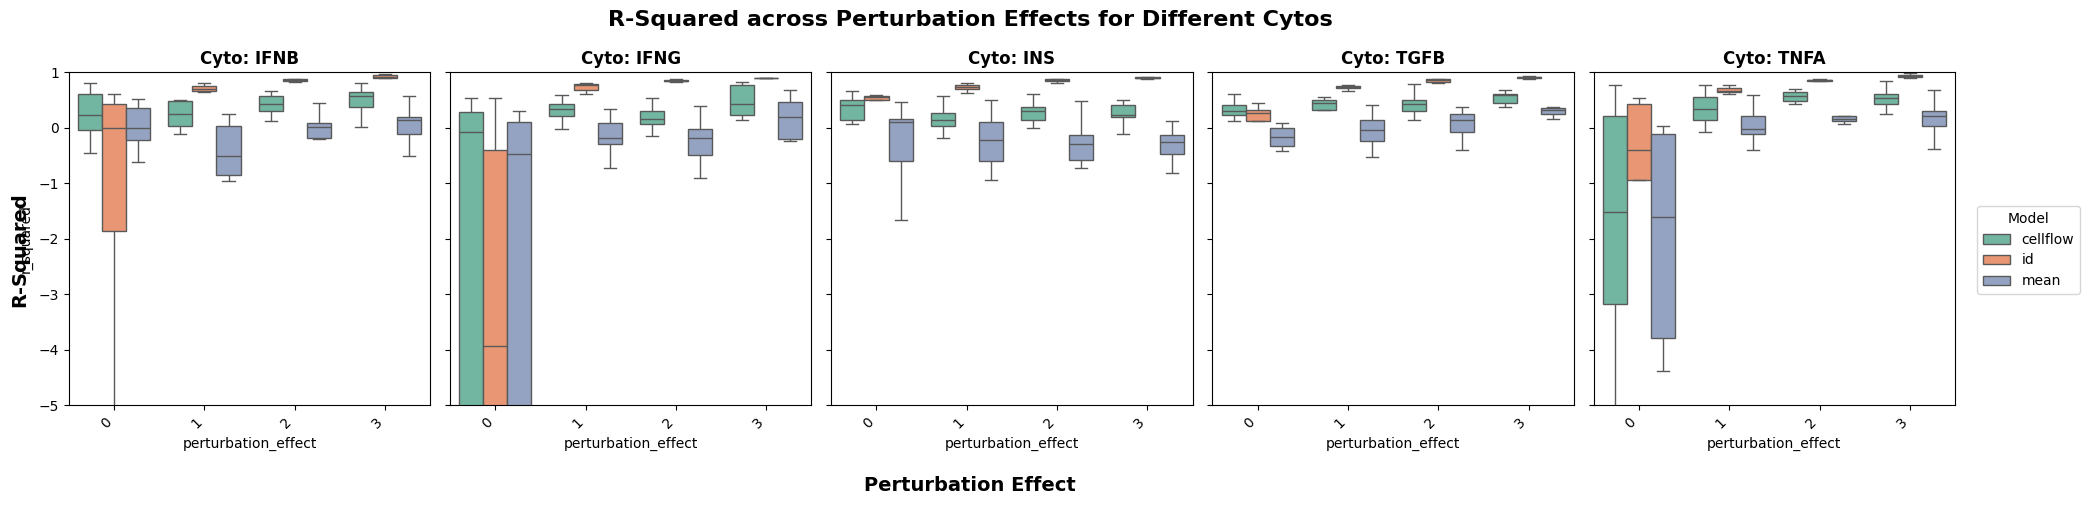

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 5 unique values of "cyto"
unique_cytos = merged["cyto"].unique()[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)  # 5 subplots, shared y-axis

# Iterate over unique "cyto" values and plot in subplots
for i, cyto in enumerate(unique_cytos):
    ax = axes[i]
    subset_data = merged[merged["cyto"] == cyto]  # Filter data for current "cyto"

    # Create the boxplot
    sns.boxplot(
        data=subset_data,
        x="perturbation_effect",
        hue="model",
        y="r_squared",
        showfliers=False,  # Hide outliers for cleaner visualization
        # hue_order=["Identity", "Mean", "CellFlow"],  # Uncomment if needed
        palette="Set2",  # Use a visually distinct color palette
        ax=ax
    )

    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set title for each subplot
    ax.set_title(f"Cyto: {cyto}", fontsize=12, fontweight="bold")

    # Set y-axis limits
    ax.set_ylim(-5, 1)

    # Remove individual legends
    ax.legend_.remove()

# Add global labels
fig.supxlabel("Perturbation Effect", fontsize=14, fontweight="bold")
fig.supylabel("R-Squared", fontsize=14, fontweight="bold")
fig.suptitle("R-Squared across Perturbation Effects for Different Cytos", fontsize=16, fontweight="bold")

# Add a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title="Model")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()
